# **셋째마당. 실전! 데이터 분석 프로젝트**
---
---


# 데이터 분석 프로젝트  - 한국복지패널 데이터

### 데이터 분석 준비하기

#### 1. 데이터 준비하기



In [ ]:
# 다른 통계 분석 소프트웨어 전용 파일 처리용 라이브러리 설치
!pip install pyreadstat

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 12.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat

#### 2. 데이터 불러오기

In [ ]:
### 데이터 불러오기

# 구글 서버와 내 드라이브 연결
from google.colab import drive
drive.mount('/content/drive')

# 현재 작업 경로 변경
%cd '/content/drive/MyDrive/KDT/정형데이터분석시각화'

# raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')
raw_welfare, meta = pyreadstat.read_sav('Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기 
welfare = raw_welfare.copy()

Mounted at /content/drive
/content/drive/MyDrive/KDT/정형데이터분석시각화


#### 3. 데이터 검토하기

In [ ]:
welfare             # 앞부분, 뒷부분 출력

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
0,2.0,1.0,1.0,20101.0,0.0,NaN,0.291589,0.291589,1307.764781,1307.764781,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,3.0,1.0,1.0,30101.0,0.0,NaN,0.419753,0.419753,1882.570960,1882.570960,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
4,6.0,1.0,1.0,60101.0,0.0,NaN,1.017935,1.017935,4565.389177,4565.389177,...,1.0,.,1.0,5.0,2.0,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14413,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14414,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
14415,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,208.0,NaN,0.0,NaN
14416,9800.0,7.0,1.0,98000701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,5.0,.,4.0,3.0,3.0,NaN,1200.0,NaN,0.0,NaN


In [ ]:
welfare.shape       # 행, 열 개수 출력

(14418, 830)

In [ ]:
welfare.info()      # 변수 속성 출력

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14418 entries, 0 to 14417
Columns: 830 entries, h14_id to h14_pers_income5
dtypes: float64(826), object(4)
memory usage: 91.3+ MB


In [ ]:
welfare.describe()  # 요약 통계량

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_63,wc14_64,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
count,14418.000000,14418.000000,14418.000000,1.441800e+04,14418.000000,121.000000,11513.000000,11513.000000,11513.000000,11513.000000,...,2027.000000,2027.000000,2027.000000,2027.000000,2027.000000,2659.000000,3331.000000,989.000000,14418.000000,715.000000
mean,4672.108406,3.121723,1.004855,4.672140e+07,0.201484,2.256198,1.000000,1.000000,4484.952219,4484.952541,...,3.211643,3.743957,3.513567,4.100641,3.233350,4141.380594,1389.440408,3457.835187,2.038702,1183.292308
std,2792.998128,3.297963,0.143205,2.793014e+07,0.401123,1.675952,0.906021,1.016782,4063.459773,4560.218659,...,2.174768,3.138629,1.045929,0.937712,1.289456,2583.755449,1211.910836,6619.516319,32.965477,2147.418274
min,2.000000,1.000000,1.000000,2.010100e+04,0.000000,1.000000,0.001998,0.000000,8.960093,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-47000.000000,0.000000,-10600.000000
25%,2356.000000,1.000000,1.000000,2.356030e+07,0.000000,1.000000,0.341814,0.269286,1533.021553,1207.736094,...,1.000000,2.000000,3.000000,4.000000,2.000000,2448.000000,391.500000,1000.000000,0.000000,206.000000
50%,4535.000000,1.000000,1.000000,4.535010e+07,0.000000,2.000000,0.726304,0.704045,3257.436901,3157.609630,...,3.000000,3.000000,4.000000,4.000000,3.000000,3540.000000,1116.000000,2498.000000,0.000000,530.000000
75%,6616.000000,7.000000,1.000000,6.616010e+07,0.000000,2.000000,1.366071,1.390045,6126.762919,6234.287538,...,5.000000,5.000000,4.000000,5.000000,4.000000,5378.500000,2040.000000,4687.000000,0.000000,1295.000000
max,9800.000000,14.000000,9.000000,9.800070e+07,1.000000,7.000000,4.727006,5.790039,21200.393903,25968.049029,...,9.000000,99.000000,9.000000,9.000000,9.000000,22700.000000,11500.000000,170000.000000,3000.000000,22644.000000


#### 4. 변수명 바꾸기

In [ ]:
### 컬럼 이름 --> 부분적으로 변경 --> df.rename(columns={'old':'new'})

welfare = welfare.rename(columns = {'h14_g3'     : 'gender',            #  성별
                                    'h14_g4'     : 'birth',          #  태어난 연도
                                    'h14_g10'    : 'marriage_type',  #  혼인 상태
                                    'h14_g11'    : 'religion',       #  종교 
                                    'p1402_8aq1' : 'income',         #  월급 
                                    'h14_eco9'   : 'code_job',       #  직업 코드
                                    'h14_reg7'   : 'code_region'})   #  지역 코드

## 01 성별에 따른 월급 차이 - 성별에 따라 월급이 다를까?

### 성별 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [ ]:
# 변수 타입 출력
welfare['gender'].dtypes  

dtype('float64')

#### 2. 전처리하기

In [ ]:
# 이상치 결측 처리
welfare['gender'] = np.where(welfare['gender'] == 9, np.nan, welfare['gender'])
 
# 결측치 확인
welfare['gender'].isna().sum()

0

In [ ]:
# 항목별 빈도수 구하기
welfare['gender'].value_counts()  

2.0    7913
1.0    6505
Name: gender, dtype: int64

In [ ]:
# gender 컬럼 --> 항목 --> 이름 부여
welfare.gender.replace({1.0:'male', 2.0:'female'}, inplace=True)

In [ ]:
# 항목별 빈도수 구하기
welfare['gender'].value_counts()

female    7913
male      6505
Name: gender, dtype: int64

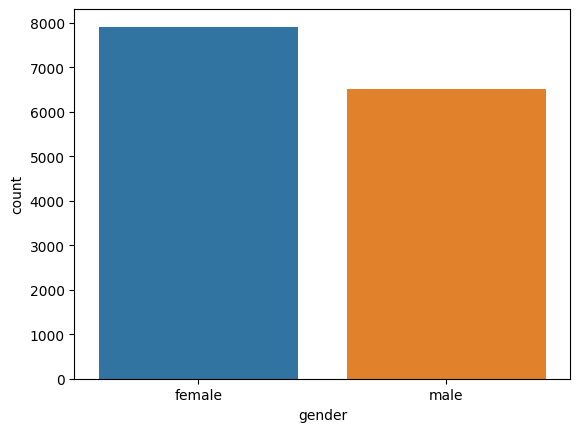

In [ ]:
# 빈도 막대 그래프 만들기
sns.countplot(data = welfare, x = 'gender')
plt.show()

### 월급 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [ ]:
# 변수 타입 출력
welfare['income'].dtypes  

dtype('float64')

#### 2. 전처리하기

In [ ]:
# 코드북 --> 누락 데이터 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

# 누락 데이터 확인
welfare['income'].isnull().sum()

9884

In [ ]:
### 누락 데이터 제거하기
cleaned_income = welfare['income'].dropna()

# 결과 확인하기
cleaned_income.isnull().sum()

0

In [ ]:
### 요약 통계량 구하기
cleaned_income.describe()  

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

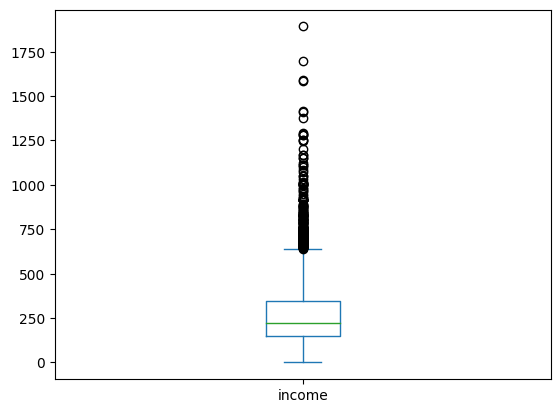

In [ ]:
### boxplot --> 이상치 시각화
cleaned_income.plot(kind='box')
plt.show()

In [ ]:
### 이상치 확인하기 - 4분위 수 구하기

'''
cleaned_income.quantile(q=)
'''

# 1/4 분위수 구하기
q1 = cleaned_income.quantile(q=0.25)
print(f'1사분위수 = {q1}')

print('-'*80)

# 2/4 분위수 구하기
q2 = cleaned_income.quantile(q=0.5)
print(f'2사분위수 = {q2}')

print('-'*80)

# 3/4 분위수 구하기
q3 = cleaned_income.quantile(q=0.75)
print(f'3사분위수 = {q3}')

1사분위수 = 150.0
--------------------------------------------------------------------------------
2사분위수 = 220.0
--------------------------------------------------------------------------------
3사분위수 = 345.75


In [ ]:
### 이상치 확인하기 - IQR 구하기
IQR = q3 - q1

print(IQR)

195.75


In [ ]:
### 이상치 확인하기 - 정상 범위 데이터의 최소값 / 최대값 구하기

'''
1. min = q1 - (1.5 * IQR)
2. max = q3 + (1.5 * IQR)
3, 정상 데이터 : (min, max)
'''

# 최소값 구하기
min = q1 - (1.5 * IQR)
print(f'정상 데이터의 최소값 : {min}')

print('-'*80)

# 최대값 구하기
max = q3 + (1.5 * IQR)
print(f'정상 데이터의 최대값 : {max}')

정상 데이터의 최소값 : -143.625
--------------------------------------------------------------------------------
정상 데이터의 최대값 : 639.375


In [ ]:
### 이상치 제거하기 --> boolean 배열 이용
income_drop_outlier = cleaned_income[cleaned_income <= 639.375]

# 결과 확인하기
income_drop_outlier

2        107.0
3        192.0
7         27.0
8         27.0
14       338.0
         ...  
14401    280.0
14402    209.0
14405     27.0
14410    200.0
14416    200.0
Name: income, Length: 4273, dtype: float64

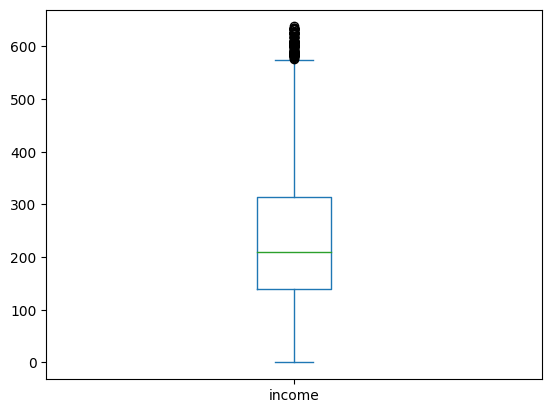

In [ ]:
### boxplot --> 이상치 시각화(2)
income_drop_outlier.plot(kind='box')
plt.show()

In [ ]:
### 이상치 확인하기(2) - 4분위 수 구하기

'''
income_drop_outlier.quantile(q=)
'''

# 1/4 분위수 구하기
q1 = income_drop_outlier.quantile(q=0.25)
print(f'1사분위수 = {q1}')

print('-'*80)

# 2/4 분위수 구하기
q2 = income_drop_outlier.quantile(q=0.5)
print(f'2사분위수 = {q2}')

print('-'*80)

# 3/4 분위수 구하기
q3 = income_drop_outlier.quantile(q=0.75)
print(f'3사분위수 = {q3}')

1사분위수 = 140.0
--------------------------------------------------------------------------------
2사분위수 = 210.0
--------------------------------------------------------------------------------
3사분위수 = 314.0


In [ ]:
### 이상치 확인하기(2) - IQR 구하기
IQR = q3 - q1

print(IQR)

174.0


In [ ]:
### 이상치 확인하기(2) - 정상 범위 데이터의 최소값 / 최대값 구하기

'''
1. min = q1 - (1.5 * IQR)
2. max = q3 + (1.5 * IQR)
3, 정상 데이터 : (min, max)
'''

# 최소값 구하기
min = q1 - (1.5 * IQR)
print(f'정상 데이터의 최소값 : {min}')

print('-'*80)

# 최대값 구하기
max = q3 + (1.5 * IQR)
print(f'정상 데이터의 최대값 : {max}')

정상 데이터의 최소값 : -121.0
--------------------------------------------------------------------------------
정상 데이터의 최대값 : 575.0


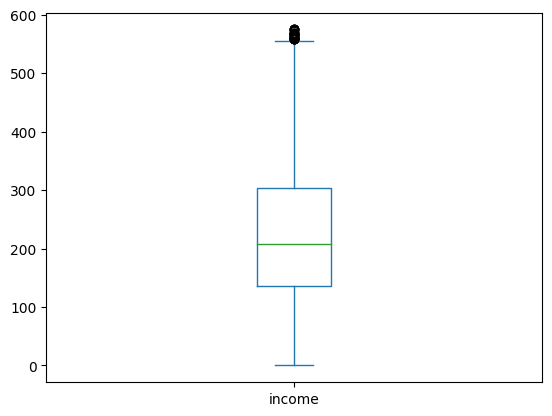

In [ ]:
### 이상치 제거하기(2) --> boolean 배열 이용
income_drop_outlier = income_drop_outlier[income_drop_outlier <= 575.0]

# 결과 확인하기
income_drop_outlier.plot(kind='box')
plt.show()

In [ ]:
### 이상치 확인하기(3) - 4분위 수 구하기

'''
income_drop_outlier.quantile(q=)
'''

# 1/4 분위수 구하기
q1 = income_drop_outlier.quantile(q=0.25)
print(f'1사분위수 = {q1}')

print('-'*80)

# 2/4 분위수 구하기
q2 = income_drop_outlier.quantile(q=0.5)
print(f'2사분위수 = {q2}')

print('-'*80)

# 3/4 분위수 구하기
q3 = income_drop_outlier.quantile(q=0.75)
print(f'3사분위수 = {q3}')

1사분위수 = 136.0
--------------------------------------------------------------------------------
2사분위수 = 208.0
--------------------------------------------------------------------------------
3사분위수 = 304.0


In [ ]:
### 이상치 확인하기(3) - IQR 구하기
IQR = q3 - q1

print(IQR)

168.0


In [ ]:
### 이상치 확인하기(3) - 정상 범위 데이터의 최소값 / 최대값 구하기

'''
1. min = q1 - (1.5 * IQR)
2. max = q3 + (1.5 * IQR)
3, 정상 데이터 : (min, max)
'''

# 최소값 구하기
min = q1 - (1.5 * IQR)
print(f'정상 데이터의 최소값 : {min}')

print('-'*80)

# 최대값 구하기
max = q3 + (1.5 * IQR)
print(f'정상 데이터의 최대값 : {max}')

정상 데이터의 최소값 : -116.0
--------------------------------------------------------------------------------
정상 데이터의 최대값 : 556.0


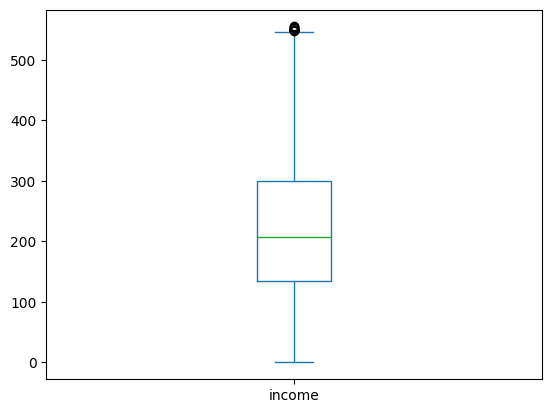

In [ ]:
### 이상치 제거하기(3) --> boolean 배열 이용
income_drop_outlier = income_drop_outlier[income_drop_outlier <= 556.0]

# 결과 확인하기
income_drop_outlier.plot(kind='box')
plt.show()

In [ ]:
### 이상치 확인하기(4) - 4분위 수 구하기

'''
income_drop_outlier.quantile(q=)
'''

# 1/4 분위수 구하기
q1 = income_drop_outlier.quantile(q=0.25)
print(f'1사분위수 = {q1}')

print('-'*80)

# 2/4 분위수 구하기
q2 = income_drop_outlier.quantile(q=0.5)
print(f'2사분위수 = {q2}')

print('-'*80)

# 3/4 분위수 구하기
q3 = income_drop_outlier.quantile(q=0.75)
print(f'3사분위수 = {q3}')

1사분위수 = 135.0
--------------------------------------------------------------------------------
2사분위수 = 208.0
--------------------------------------------------------------------------------
3사분위수 = 300.0


In [ ]:
### 이상치 확인하기(4) - IQR 구하기
IQR = q3 - q1

print(IQR)

165.0


In [ ]:
### 이상치 확인하기(4) - 정상 범위 데이터의 최소값 / 최대값 구하기

'''
1. min = q1 - (1.5 * IQR)
2. max = q3 + (1.5 * IQR)
3, 정상 데이터 : (min, max)
'''

# 최소값 구하기
min = q1 - (1.5 * IQR)
print(f'정상 데이터의 최소값 : {min}')

print('-'*80)

# 최대값 구하기
max = q3 + (1.5 * IQR)
print(f'정상 데이터의 최대값 : {max}')

정상 데이터의 최소값 : -112.5
--------------------------------------------------------------------------------
정상 데이터의 최대값 : 547.5


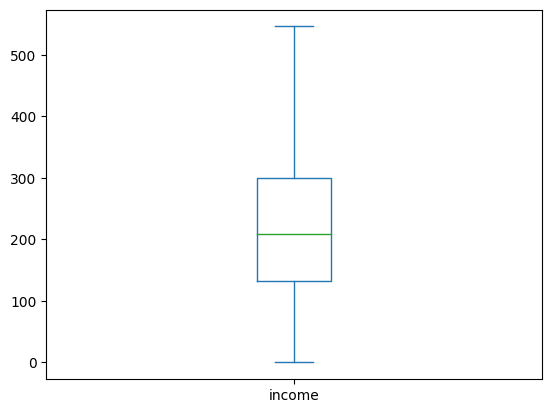

In [ ]:
### 이상치 제거하기(4) --> boolean 배열 이용
income_drop_outlier = income_drop_outlier[income_drop_outlier <= 547.5]

# 결과 확인하기
income_drop_outlier.plot(kind='box')
plt.show()

In [ ]:
### 요약 통계량 확인
income_drop_outlier.describe()

count    4121.000000
mean      222.335841
std       127.529339
min         0.000000
25%       133.000000
50%       208.000000
75%       300.000000
max       546.000000
Name: income, dtype: float64

In [ ]:
### income --> 정상 --> 인덱스 추출
normal_index = income_drop_outlier.index
print(normal_index)

Int64Index([    2,     3,     7,     8,    14,    15,    19,    25,    26,
               27,
            ...
            14376, 14387, 14388, 14389, 14398, 14401, 14402, 14405, 14410,
            14416],
           dtype='int64', length=4121)


In [ ]:
### income --> 정상 --> 데이터프레임 추출
welfare1 = welfare.iloc[normal_index, :]
welfare1

,h14_id,h14_ind,h14_sn,h14_merkey,h_new,h14_cobf,p14_wsc,p14_wsl,p14_wgc,p14_wgl,...,wc14_64,wc14_65,wc14_5aq4,wc14_5aq5,wc14_5aq6,h14_pers_income1,h14_pers_income2,h14_pers_income3,h14_pers_income4,h14_pers_income5
2,4.0,1.0,1.0,40101.0,0.0,NaN,0.265263,0.265980,1189.691668,1192.908537,...,NaN,,NaN,NaN,NaN,NaN,1284.0,NaN,0.0,NaN
3,6.0,1.0,1.0,60101.0,0.0,NaN,0.494906,0.495941,2219.630833,2224.273816,...,1.0,.,2.0,4.0,4.0,2304.0,NaN,1800.0,0.0,NaN
7,6.0,1.0,1.0,60101.0,0.0,NaN,0.262072,0.262072,1175.380055,1175.380055,...,NaN,,NaN,NaN,NaN,NaN,243.0,NaN,0.0,NaN
8,8.0,1.0,1.0,80101.0,0.0,NaN,0.133319,0.133319,597.930077,597.930077,...,NaN,,NaN,NaN,NaN,NaN,410.0,NaN,0.0,NaN
14,15.0,1.0,1.0,150101.0,0.0,NaN,0.511827,0.540321,2295.519261,2423.314062,...,7.0,.,2.0,5.0,4.0,4060.0,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14401,9793.0,7.0,1.0,97930701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,3.0,.,4.0,3.0,3.0,NaN,3360.0,NaN,0.0,NaN
14402,9793.0,7.0,1.0,97930701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,2506.0,NaN,0.0,NaN
14405,9794.0,7.0,1.0,97940701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,NaN,243.0,NaN,20.0,NaN
14410,9798.0,7.0,1.0,97980701.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,,NaN,NaN,NaN,2400.0,NaN,NaN,0.0,NaN


### 성별에 따른 월급 차이 분석하기

#### 1. 성별 월급 평균표 만들기

In [ ]:
## 성별 월급 평균표 만들기

'''
1. income 결측치 제거
2. gender별 분리
3. income 평균 구하기
'''
gender_income1 = welfare1[['gender','income']].groupby(by=['gender']).mean()
gender_income1

,income
gender,
female,173.992234
male,277.110248


In [ ]:
# ## 성별 월급 평균표 만들기

# '''
# 1. income 결측치 제거
# 2. gender별 분리
# 3. income 평균 구하기
# '''
# gender_income1 = welfare.dropna(subset = ['income'])[['gender','income']].groupby(by=['gender']).mean()
# gender_income1

In [ ]:
## 성별 월급 평균표 만들기

'''
1. income 결측치 제거
2. gender별 분리
3. income 평균 구하기
'''
gender_income2 = welfare1.groupby('gender')['income'].mean()
gender_income2

gender
female    173.992234
male      277.110248
Name: income, dtype: float64

In [ ]:
## 성별 월급 평균표 만들기

# income 결측치 제거
# sex별 분리
# income 평균 구하기
gender_income3 = welfare1.groupby('gender').agg({'income':'mean'})
gender_income3

,income
gender,
female,173.992234
male,277.110248


In [ ]:
## 성별 월급 평균표 만들기

# income 결측치 제거
# sex별 분리
# income 평균 구하기
gender_income4 = welfare1.groupby('gender', as_index=False).agg({'income':'mean'})
gender_income4

,gender,income
0,female,173.992234
1,male,277.110248


In [ ]:
## 성별 월급 평균표 만들기

# income 결측치 제거
# sex별 분리
# income 평균 구하기
gender_income5 = welfare1.groupby('gender').agg({'income':['mean','median']})
gender_income5

income       
              mean median
gender                   
female  173.992234  174.0
male    277.110248  270.0

#### 2. 그래프 만들기

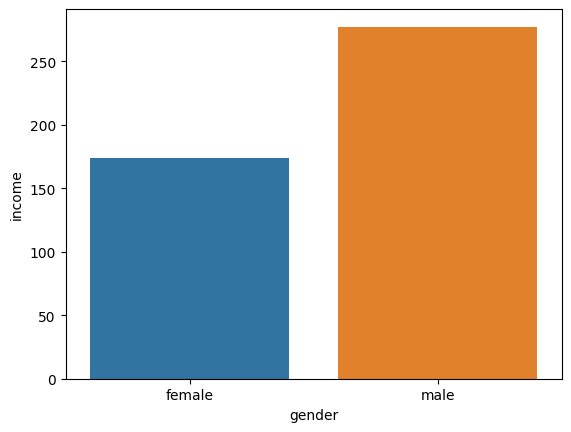

In [ ]:
# 막대 그래프 만들기
sns.barplot(data = gender_income4, x = 'gender', y = 'income')  
plt.show()

## 02 나이와 월급의 관계 - 몇 살 때 월급을 가장 많이 받을까?

### 나이 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [ ]:
### 변수 타입 출력
welfare1['birth'].dtypes  

dtype('float64')

#### 2. 전처리하기

In [ ]:
# 이상치 결측 처리
welfare1.loc[welfare1['birth'] == 9999, 'birth'] = np.nan

# 결측치 확인
welfare1['birth'].isnull().sum()

0

In [ ]:
### 요약 통계량 구하기
welfare1['birth'].describe()  

count    4121.000000
mean     1971.179568
std        15.881793
min      1928.000000
25%      1960.000000
50%      1973.000000
75%      1983.000000
max      2001.000000
Name: birth, dtype: float64

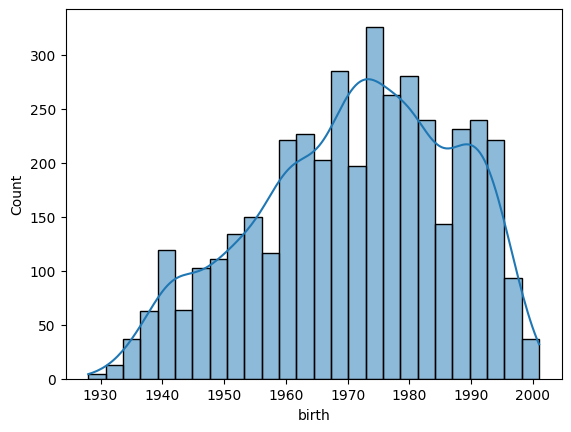

In [ ]:
 # 히스토그램 --> 시각화
sns.histplot(data = welfare1, x = 'birth', kde=True)  
plt.show()

#### 3. 파생변수 만들기 - 나이

In [ ]:
### 나이 변수 만들기
welfare1 = welfare1.assign(age = 2019 - welfare1['birth'] + 1)  

# 결과 확인하기 --> 요약 통계량 구하기
welfare1['age'].describe()                                   

count    4121.000000
mean       48.820432
std        15.881793
min        19.000000
25%        37.000000
50%        47.000000
75%        60.000000
max        92.000000
Name: age, dtype: float64

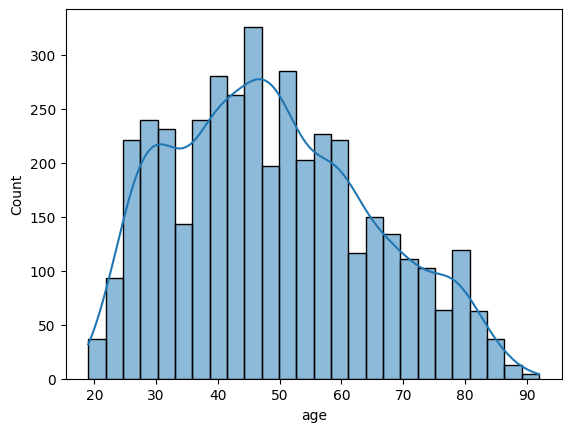

In [ ]:
# 연령 --> 히스토그램 --> 시각화
sns.histplot(data = welfare1, x = 'age', kde=True) 
plt.show()

### 나이와 월급의 관계 분석하기

#### 1. 나이에 따른 월급 평균표 만들기

In [ ]:
### 나이별 월급 평균표 만들기

'''
1. age --> groupby
2. income 평균 구하기
'''

age_income = welfare1.groupby(by='age').agg({'income':'mean'})

# 결과 시각화
age_income

,income
age,
19.0,162.000000
20.0,121.333333
21.0,136.400000
22.0,123.666667
23.0,179.676471
...,...
88.0,27.000000
89.0,27.000000
90.0,27.000000


#### 2.  그래프 만들기

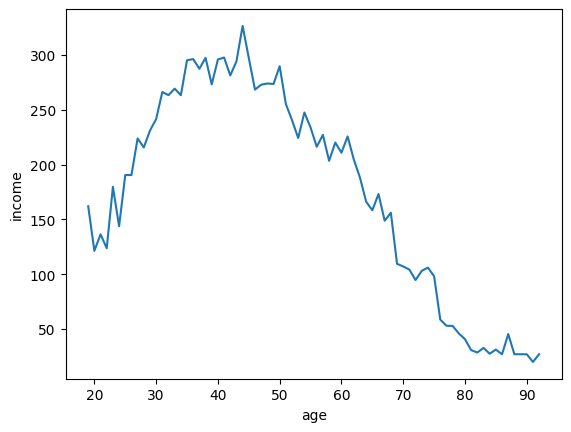

In [ ]:
### 선 그래프 만들기
sns.lineplot(data = age_income, x = 'age', y = 'income')
plt.show()  

## 03 연령대에 따른 월급 차이 - 어떤 연령대의 월급이 가장 많을까?

### 연령대 변수 검토 및 전처리하기

#### 파생변수 만들기 - 연령대


In [ ]:
# 나이 --> 변수 타입 출력
welfare1['age'].dtypes

dtype('float64')

In [ ]:
### 연령대 변수 만들기
welfare1 = welfare1.assign(age_group = np.where(welfare1['age'] <  30, 'young', np.where(welfare1['age'] <= 59, 'middle', 'old')))

# 항목별 빈도수 구하기
welfare1['age_group'].value_counts()

middle    2541
old       1067
young      513
Name: age_group, dtype: int64

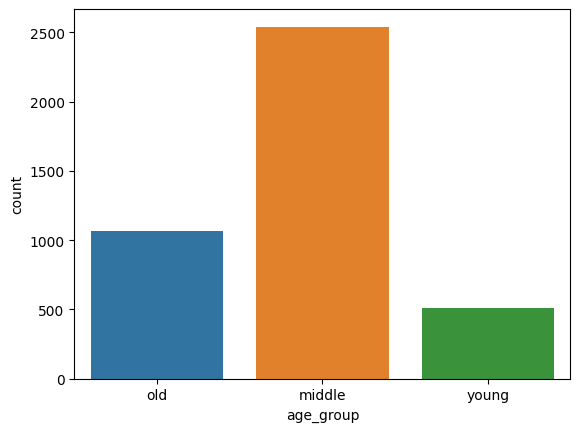

In [ ]:
### 연령별 빈도수 --> 막대 그래프 만들기
sns.countplot(data = welfare1, x = 'age_group')
plt.show()

### 연령대에 따른 월급 차이 분석하기

#### 1. 연령대별 월급 평균표 만들기

In [ ]:
### 연령대별 월급 평균표 만들기

'''
1. age_group --> groupby
2. income 평균 구하기
'''

age_group_income = welfare1.groupby('age_group', as_index = False).agg({'income':'mean'})

# 결과 확인하기
age_group_income

,age_group,income
0,middle,268.201889
1,old,126.295220
2,young,194.908382


#### 2. 그래프 만들기

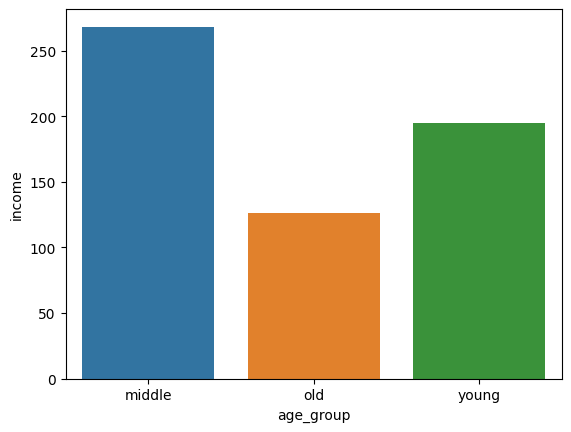

In [ ]:
### 연령대별 월급 평균표 --> 막대 그래프 --> 시각화
sns.barplot(data = age_group_income, x = 'age_group', y = 'income')
plt.show()

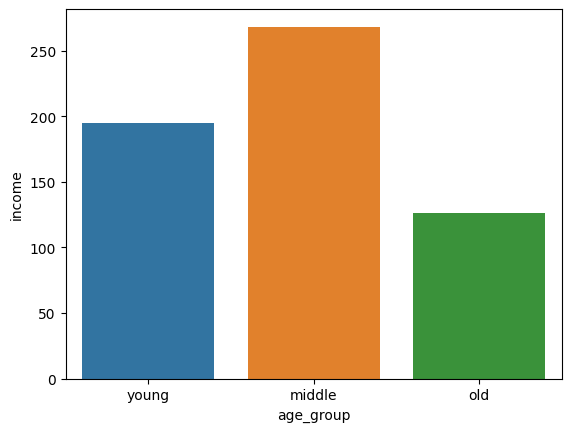

In [ ]:
### 막대 그래프 정렬하기
sns.barplot(data = age_group_income, x = 'age_group', y = 'income', order = ['young', 'middle', 'old'])
plt.show()

## 04 연령대 및 성별 월급 차이 - 성별 월급 차이는 연령대별로 다를까?

### 연령대 및 성별 월급 차이 분석하기

#### 1. 연령대 및 성별 월급 평균표 만들기

In [ ]:
### 연령대 및 성별 월급 평균표 만들기

'''
1. age_group, gender --> groupby
2. income 평균 구하기
'''

gender_income = welfare1.groupby(['age_group', 'gender'], as_index = False).agg({'income':'mean'})

# 결과 확인하기
gender_income

,age_group,gender,income
0,middle,female,211.727778
1,middle,male,323.750195
2,old,female,88.433225
3,old,male,177.613687
4,young,female,189.822222
5,young,male,203.000000


#### 2. 그래프 만들기

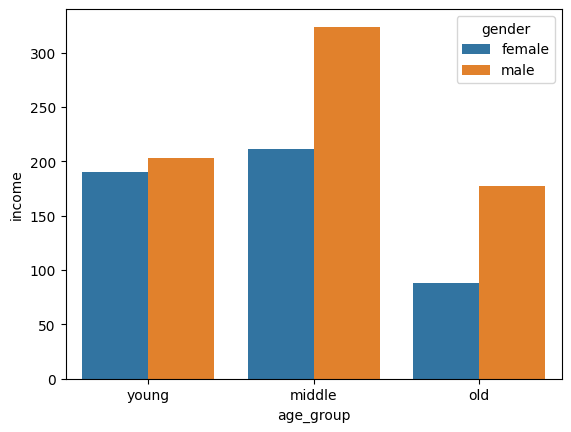

In [ ]:
# 연령대 및 성별 월급 평균표 --> 막대 그래프 --> 시각화
sns.barplot(data = gender_income, x = 'age_group', y = 'income', hue = 'gender', order = ['young', 'middle', 'old'])
plt.show()

### 나이 및 성별 월급 차이 분석하기

In [ ]:
### 나이 및 성별 월급 평균표 만들기

'''
1. age, gender --> groupby
2. income 평균 구하기
'''

gender_age = welfare1.groupby(['age', 'gender'], as_index = False).agg({'income':'mean'})

# 결과 확인하기
gender_age

,age,gender,income
0,19.0,male,162.000000
1,20.0,female,87.666667
2,20.0,male,155.000000
3,21.0,female,124.000000
4,21.0,male,186.000000
...,...,...,...
140,89.0,male,27.000000
141,90.0,female,27.000000
142,91.0,female,27.000000
143,91.0,male,13.000000


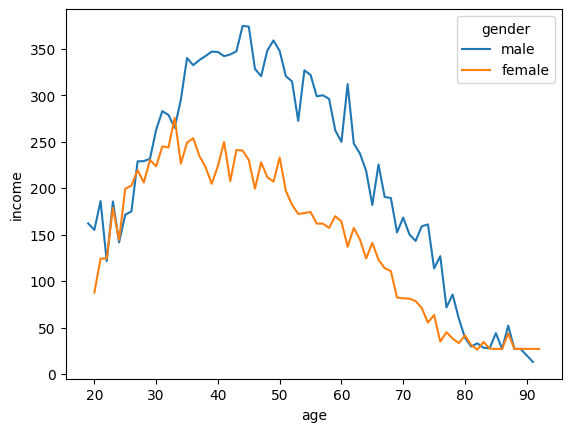

In [ ]:
### 나이 및 성별 월급 평균표 --> 선 그래프 --> 시각화
sns.lineplot(data = gender_age, x = 'age', y = 'income', hue = 'gender')
plt.show()

## 05 직업별 월급 차이 - 어떤 직업이 월급을 가장 많이 받을까?

### 직업 변수 검토 및 전처리하기

#### 1. 변수 검토하기

In [ ]:
### 변수 타입 출력
welfare1['code_job'].dtypes  

dtype('float64')

In [ ]:
### 항목별 빈도수 구하기
welfare1['code_job'].value_counts()  

941.0    353
312.0    197
930.0    196
313.0    193
521.0    165
        ... 
122.0      1
742.0      1
861.0      1
112.0      1
872.0      1
Name: code_job, Length: 145, dtype: int64

#### 2. 전처리하기

In [ ]:
### Koweps_Codebook_2019.xlsx file --> 직종코드 sheet 불러오기
list_job = pd.read_excel('Koweps_Codebook_2019.xlsx', sheet_name = '직종코드')
list_job

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자
...,...,...
151,992,계기∙자판기 및 주차 관리 종사자
152,999,기타 서비스 관련 단순 종사자
153,1001,장교
154,1002,부사관


In [ ]:
### welfare1에 list_job 결합하기
welfare1 = welfare1.merge(list_job, how = 'left', on = 'code_job')

0       762.0
1       855.0
2       941.0
3       999.0
4       312.0
        ...  
4116    874.0
4117    930.0
4118    941.0
4119    854.0
4120    246.0
Name: code_job, Length: 4121, dtype: float64

In [ ]:
### 결합의 결과 확인하기 --> code_job 결측치 제거하고 code_job, job 출력
welfare1.dropna(subset = ['code_job'])[['code_job', 'job']]

,code_job,job
0,762.0,전기공
1,855.0,금속기계 부품 조립원
2,941.0,청소원 및 환경미화원
3,999.0,기타 서비스 관련 단순 종사자
4,312.0,경영 관련 사무원
...,...,...
4116,874.0,물품 이동 장비 조작원
4117,930.0,제조 관련 단순 종사자
4118,941.0,청소원 및 환경미화원
4119,854.0,운송차량 및 기계 관련 조립원


### 직업별 월급 차이 분석하기

#### 1. 직업별 월급 평균표 만들기

In [ ]:
### 직업별 월급 평균표 만들기

'''
1. job --> groupby
2. income 평균 구하기
'''

job_income = welfare1.groupby(by=['job']).agg({'income':'mean'})
# job_income = welfare1.groupby('job', as_index = False).agg({'income':'mean'})

# 결과 확인하기
job_income

,income
job,
가사 및 육아 도우미,92.455882
간호사,254.154930
감정∙기술영업및중개관련종사자,312.357143
건물 관리원 및 검표원,168.375000
건설 및 광업 단순 종사자,261.975000
...,...
화학∙고무 및 플라스틱 제품 생산기 조작원,289.000000
화학공학 기술자 및 시험원,325.750000
환경∙청소 및 경비 관련 관리자,201.000000


#### 2. 월급이 많은 직업 추출하기

In [ ]:
### 상위 10위개 직업 추출
top10 = job_income.sort_values(by=['income'], ascending = False).head(10)
top10

,income
job,
약사 및 한약사,515.000000
연구∙교육 및 법률 관련 관리자,466.000000
상품 기획∙홍보 및 조사 전문가,452.600000
장교,447.000000
전기∙전자공학 기술자 및 시험원,429.714286
부사관,417.545455
건설구조관련기능종사자,412.666667
경찰∙소방 및 교도 관련 종사자,404.206897
기타 전문 서비스 관리자,376.000000


#### 3. 월급이 적은 직업 추출하기

In [ ]:
### 하위 10개 직업 추출
bottom10 = job_income.sort_values(by=['income']).head(10)
bottom10

,income
job,
기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
기타 서비스 관련 단순 종사자,77.789474
청소원 및 환경미화원,88.461756
가사 및 육아 도우미,92.455882
돌봄 및 보건 서비스 종사자,117.162338
음식 관련 단순 종사자,118.187500
농림∙어업 관련 단순 종사자,122.625000
채굴 및 토목 관련 기능 종사자,140.000000
학예사∙사서 및 기록물 관리사,140.000000


## 06 성별 직업 빈도 - 성별로 어떤 직업이 가장 많을까?

### 성별 직업 빈도 분석하기


In [ ]:
### 남성 직업 빈도 상위 10개 추출 --> loc 인덱서 + 블리언 배열
male_job = welfare1.loc[welfare1.gender=='male', 'job'].value_counts()
male_job_top10 = male_job[:10]
male_job_top10

경영 관련 사무원           145
자동차 운전원             111
청소원 및 환경미화원          92
건물 관리원 및 검표원         78
영업 종사자               74
제조 관련 단순 종사자         68
매장 판매 종사자            59
행정 사무원               54
배달원                  52
기타 서비스 관련 단순 종사자     50
Name: job, dtype: int64

In [ ]:
### 남성 직업 빈도 상위 10개 추출 --> loc 인덱서 + 블리언 배열
female_job = welfare1.loc[welfare1.gender=='female', 'job'].value_counts()
female_job_top10 = female_job[:10]
female_job_top10

청소원 및 환경미화원         261
돌봄 및 보건 서비스 종사자     151
회계 및 경리 사무원         149
제조 관련 단순 종사자        128
매장 판매 종사자           106
음식 관련 단순 종사자        101
기타 서비스 관련 단순 종사자     83
고객 상담 및 기타 사무원       73
조리사                  72
간호사                  68
Name: job, dtype: int64